<a href="https://colab.research.google.com/github/AsadiAhmad/Deep-Face-Blurring/blob/main/Code/Deep_Face_Blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 2: Download Resources

In [17]:
!wget https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx -O face_detection_yunet_2023mar.onnx

--2025-05-05 10:47:23--  https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/opencv/opencv_zoo/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx [following]
--2025-05-05 10:47:24--  https://media.githubusercontent.com/media/opencv/opencv_zoo/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232589 (227K) [application/octet-stream]
Saving to: ‘face_detection_yunet_2023mar.onnx’

face_detection_yune

In [18]:
!wget https://www.psychologicalscience.org/redesign/wp-content/uploads/2014/12/many-faces-1024x705.jpg -O many_faces.jpg

--2025-05-05 10:47:24--  https://www.psychologicalscience.org/redesign/wp-content/uploads/2014/12/many-faces-1024x705.jpg
Resolving www.psychologicalscience.org (www.psychologicalscience.org)... 104.26.2.203, 104.26.3.203, 172.67.72.81, ...
Connecting to www.psychologicalscience.org (www.psychologicalscience.org)|104.26.2.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230245 (225K) [image/jpeg]
Saving to: ‘many_faces.jpg’

many_faces.jpg      100%[===================>] 224.85K  --.-KB/s    in 0.01s   

2025-05-05 10:47:24 (16.8 MB/s) - ‘many_faces.jpg’ saved [230245/230245]



# Step 3: Load Image

In [19]:
image = cv.imread('many_faces.jpg')

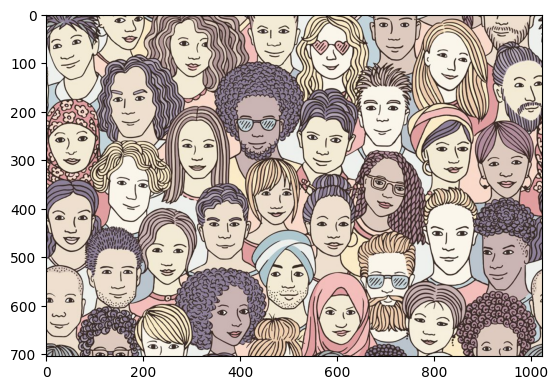

In [20]:
plt.imshow(image[...,::-1])

# Step 4: Initialize YuNet face detector

In [21]:
height, width, _ = image.shape

In [22]:
detector = cv.FaceDetectorYN.create(
    "face_detection_yunet_2023mar.onnx",
    "",
    (width, height),  # Input size (width, height)
    0.8,              # Score threshold
    0.3,              # NMS threshold
    5000              # Top-K candidates
)
# we can handel the input size by set the size and the model just reize that in input
# bigger size more accuracy but decrease the speed

In [23]:
detector.setInputSize((width, height))
result = detector.detect(image)

# Step 5: Detect All faces

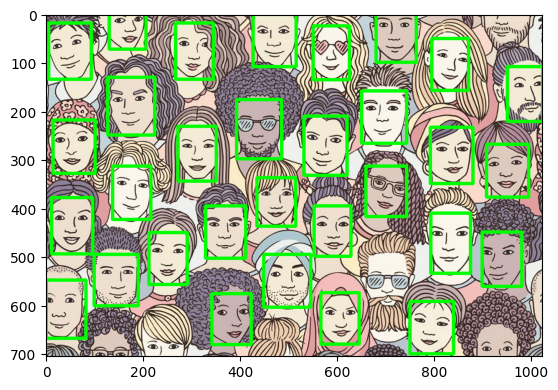

In [24]:
thickness=5
canvas = image.copy()
faces = []
if result[1] is not None: # check if the face is detected or not
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        x, y, w, h = coords[:4]
        if x < 0:
            x = 0
        if y < 0:
            y = 0
        faces.append([x, y, w, h])
        cv.rectangle(canvas, (x, y), (x+w, y+h), (0, 255, 0), thickness)

plt.imshow(canvas[...,::-1])

# Step 6: Blur All faces

In [25]:
blured_faces = []
for face in faces:
    x, y, w, h = face[:4]
    face_shape = image[y:y+h , x:x+w]
    blured_faces.append([cv.medianBlur(face_shape, 55), x, y, w, h])

In [26]:
blured_image = image.copy()
for face in blured_faces:
    face_border, x, y, w, h = face[:5]
    blured_image[y:y+h , x:x+w] = face_border

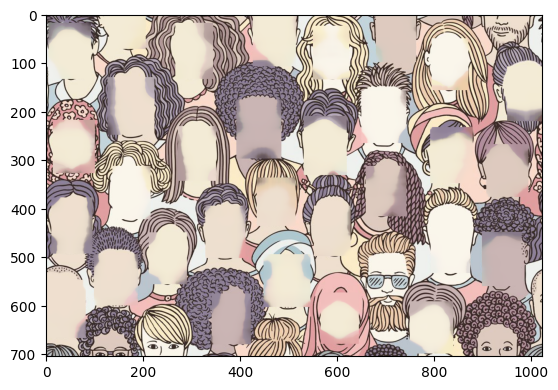

In [27]:
plt.imshow(blured_image[...,::-1])

# Step 7: Show Blured Image

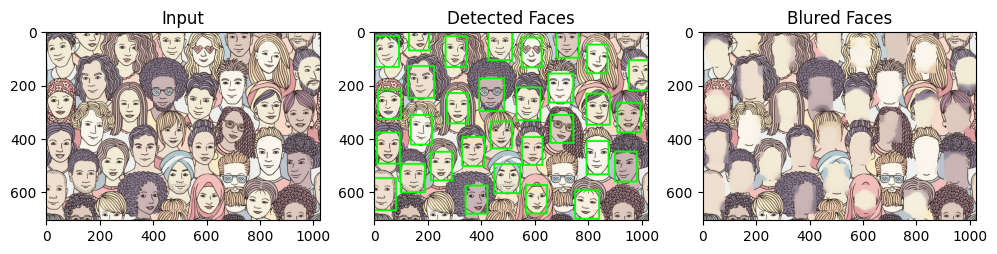

In [29]:
plt.figure(figsize=[12,4])
plt.subplot(131),plt.imshow(image[...,::-1]),plt.title('Input');
plt.subplot(132),plt.imshow(canvas[...,::-1]),plt.title('Detected Faces');
plt.subplot(133),plt.imshow(blured_image[...,::-1]),plt.title('Blured Faces');